## Import important libraries and set default values for plotting

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

In [3]:
# Import the matplotlib and seaborn packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set env variable for plotting inline
%matplotlib inline

# Set a seaborn style of your taste
sns.set_style("whitegrid")

# Set max_columns parameter to 'None', to show all the columns of the dataframe so that we can scroll across and check values
pd.options.display.max_columns = None

## 1. Importing and Inspecting the dataframe

### 1.1 Import the csv file into pandas dataframe "Data_Uber"

In [4]:
Data_Uber = pd.read_csv("Uber Request Data.csv")

In [5]:
# Replace spaces in column-name with underscore for ease of usage -- optional
Data_Uber.columns = Data_Uber.columns.str.replace(' ','_')

### 1.2 Inspect the dataframe

In [6]:
# Check inof() to get a feel of the rows and columns of the dataframe
Data_Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null object
Drop_timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [7]:
# Check the shape attribute to get a count o fthe number of rows and columns
Data_Uber.shape

(6745, 6)

In [8]:
# Use the describe() function to get the stastical information about the dataframe
Data_Uber.describe()

,Request_id,Driver_id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


The details provided are of not much help since 'Driver_id' and 'Request_id' are both columns containing uniquely identifiable data.

The statistical measures on these columns is meaningless. Rest of the columns are presently of type 'Object' (strings).

In [9]:
# Check the firt 10 rows of the data to geta feel of how the data looks.
Data_Uber.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [10]:
# Check unique values in all the columns 'Request id', 'Pickup point' , 'Status'
print("Column-wise unique values :\n{}\n".format(Data_Uber.apply(lambda x : x.nunique())))

for col in Data_Uber.columns:
    print("\nUnique values in '{}' column:".format(col))
    print(Data_Uber[col].unique())


Column-wise unique values :
Request_id           6745
Pickup_point            2
Driver_id             300
Status                  3
Request_timestamp    5618
Drop_timestamp       2598
dtype: int64


Unique values in 'Request_id' column:
[ 619  867 1807 ... 6751 6754 6753]

Unique values in 'Pickup_point' column:
['Airport' 'City']

Unique values in 'Driver_id' column:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 

__From initial look at the data, the following observations are made:__
    1. 'Request_id' -> Unique id for each trip request.
    
    2. 'Pickup_point' -> Point from where the passenger has requested the pickup.Has only two values : 'Airport' and 'City'.
    
    3. 'Driver_id' -> Unique identifier for each Uber Driver Partner. Also co'ntains some 'NaN' values.
    
    4. 'Status' -> Indicates the status of the trip. Has three status' : 'Trip Completed' , 'Cancelled' and 
        'No Cars Available'.
        
    5. 'Request_timestamp' -> Indicates the Date and Time at which the request was received from the passenger.
        Noticed that the DateTime Stamps are of 'object' datatype meaning they are present in string format.
        Also, the DateTime Stamps are present in two date formats i.e.,'dd/m/yyyy hh:mm' and 'dd-mm-yyyy hh:mm:ss'.
        Need to standardize to convert the column to 'datetime' datatype and thus standardize the date format.
        
    6. 'Drop_timestamp' -> Indicates the Date and Time at which the passenger dropped at the destination.
        Noticed that the DateTime Stamps are of 'object' datatype meaning they are present in string format.
        Also, the DateTime Stamps are present in two date formats i.e., 'dd/m/yyyy hh:mm' and 'dd-mm-yyyy hh:mm:ss'.
        Need to standardize to convert the column to 'datetime' datatype and thus standardize the date format.

## 2 Data Cleaning and Creation of New Derived-Columns

### 2.1 Data Cleaning

#### 2.1.1 Data Conversion 

The data in columns __'Request_timestamp'__ and __'Drop_timestamp'__ needs to be converted to __'datetime'__ datatype.

Further, the Date is present in two different date formats : __'dd/m/yyyy hh:mm'__ and __'dd-mm-yyyy hh:mm:ss'__.

Care to be taken to correctly handle these two date formats and convert to correct 'datetime' value.

Both can be handled using the __to_datetime()__ function and no additional formatting (like replacing and/or splitting) is required.

It is noticed that both the formats have day-first format. Hence, we can use the parameter __"dayfirst=True"__.

In [11]:
Data_Uber['Request_timestamp'] = pd.to_datetime(Data_Uber['Request_timestamp'],dayfirst=True)
Data_Uber['Drop_timestamp'] = pd.to_datetime(Data_Uber['Drop_timestamp'],dayfirst=True)

In [12]:
# Check the datatype of the columns and initial 10 rows for proper conversion.
print(Data_Uber.info())
Data_Uber.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null datetime64[ns]
Drop_timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB
None


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


#### 2.1.2 Duplicate Rows
Check if there are any duplicate rows unsing the __duplicated()__ function. 

In case there are duplicate rows, We need to be delete them.

In [13]:
Data_Uber[Data_Uber.duplicated()]

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp


No rows returned by the __duplicated()__ function implies that there are no duplicate rows in the dataframe.

---

#### 2.1.3 Check for Business Rule Violations

1 ) Ensure that there are no violations in the __'Request_timestamp'__ and __'Drop_Timestamp'__ columns i.e., 'Drop_Timestamp' can never be lesser than 'Request_timestamp'

In [14]:
Data_Uber[Data_Uber['Drop_timestamp'] < Data_Uber['Request_timestamp']]

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp


Since the above condition check does not return any rows, it indicates that all the rows comply to this rule with respect to 'Request_timestamp' and 'Drop_Timestamp' columns.

---

2 ) When the __'Status'__ is __'No Cars Available'__, the columns __'Driver_id'__ and __'Drop_timestamp'__ cannot have any values (and should be represented by __'NaN'__ and __'NaT'__).

Check for any records which violate this rule.

In [15]:
# Check for 'Driver_id'
print("\n'Driver_id' when 'Status' is 'No Cars Available' : {}\n".
      format(Data_Uber[Data_Uber.Status == 'No Cars Available']['Driver_id'].unique()))

# Check for 'Drop_timestamp'
print("\n'Drop_timestamp' when 'Status' is 'No Cars Available' : {}\n".
      format(Data_Uber[Data_Uber.Status == 'No Cars Available']['Drop_timestamp'].unique()))

# Count of records with 'Status' as 'No Cars Available'
print("\nCount of records with 'Status' as 'No Cars Available' : {}\n".
      format(sum(Data_Uber.Status == 'No Cars Available')))

# Display a few records where 'Status' is 'No Cars Available'
Data_Uber[Data_Uber.Status == 'No Cars Available'].head()


'Driver_id' when 'Status' is 'No Cars Available' : [nan]


'Drop_timestamp' when 'Status' is 'No Cars Available' : ['NaT']


Count of records with 'Status' as 'No Cars Available' : 2650



,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT


From the above test, it is verified that the columns __'Driver_id'__ and __'Drop_timestamp'__ do not have any values
and are represented by __'NaN'__ and __'NaT'__ values respectively.

---

3 ) When the __'Status'__ is __'Cancelled'__, the __'Drop_timestamp'__ should have __'NaN'__ values and column __'Driver_id'__ should have a valid value

Check for any records which violate this rule.

In [16]:
# Check for 'Driver_id'
print("\n'Driver_id' when 'Status' is 'Cancelled' : \n{}\n".
      format(Data_Uber[Data_Uber.Status == 'Cancelled']['Driver_id'].unique()))

# Check for 'Drop_timestamp'
print("\n'Drop_timestamp' when 'Status' is 'Cancelled' : {}\n".
      format(Data_Uber[Data_Uber.Status == 'Cancelled']['Drop_timestamp'].unique()))

# Count of records with 'Status' is 'Cancelled'
print("\nCount of records with 'Status' is 'Cancelled' : {}\n".
      format(sum(Data_Uber.Status == 'Cancelled')))

# Display a few records where 'Status' is 'Cancelled'
print("\nFew rows with 'Status' as 'Cancelled'\n")
Data_Uber[Data_Uber.Status == 'Cancelled'].head()


'Driver_id' when 'Status' is 'Cancelled' : 
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  56.  57.  58.  59.  60.
  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117.
 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131.
 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 1

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT


From the above test, it is verified that the columns __'Driver_id'__ has valid values 
and __'Drop_timestamp'__ does not have any values(represented by 'NaT' values).

Further, it appears that each of the drivers has cancelled atleast one trip.

---

### 2.2 Derived Columns

#### 2.2.1. 'Request_Date' - Capture the Date and Day of booking (Type derived metric).
'Request_Date' would be required to group car booking requests based on the Date of booking with information of the day aswell.

In [17]:
Data_Uber['Request_Date'] = Data_Uber.Request_timestamp.dt.strftime('%d-%b-%Y (%a)')

---

#### 2.2.2. 'Request_Hour' - Capture the Hour of booking (Type derived metric).
'Request_Hour' would be required to group car booking requests based on the hour of the day.

In [18]:
Data_Uber['Request_Hour'] = Data_Uber.Request_timestamp.dt.hour

---

#### 2.2.3. 'Trip_Completed' - Derive whether the trip was completed or not (Business derived metric).
'Trip_Completed' would be required to group car booking requests based on whether the trip was completed or not.

Value __Yes__ : Trip __Completed__ 

Value __No__ : Trip __Not Completed__ 

In [19]:
Data_Uber['Trip_Completed'] = Data_Uber.Status.apply(lambda x : "Yes" if x == "Trip Completed" else "No")

In [20]:
# Check initial 10 rows to ensure creation of new derived columns and correctness of values in each of these new columns.
Data_Uber.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Hour,Trip_Completed
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11-Jul-2016 (Mon),11,Yes
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11-Jul-2016 (Mon),17,Yes
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12-Jul-2016 (Tue),9,Yes
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12-Jul-2016 (Tue),21,Yes
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13-Jul-2016 (Wed),8,Yes
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13-Jul-2016 (Wed),21,Yes
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14-Jul-2016 (Thu),6,Yes
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15-Jul-2016 (Fri),5,Yes
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15-Jul-2016 (Fri),17,Yes
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,11-Jul-2016 (Mon),6,Yes


---

#### 2.2.4. 'Time_Slots' - Derive time slots based on frequency of requests(Business derived metric).
'Time_Sl0ts' would be required to group car booking requests based various time slots of the day like 'Morning','Night' etc.

To derive the 'Time_Slots', plot the number of requests received for each of the hours. Depending on the pattern, we can then group hours into various time slots.

##### 2.2.4.1 Distribution Plot: Generate a distplot using the Data_Uber.Request_Hour column to get a feel of the distribution of the requests over the hours of the day.

C:\Users\Vinay-Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


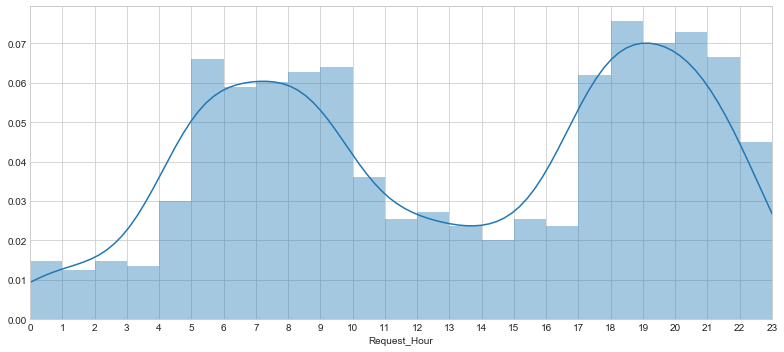

In [21]:
plt.figure(figsize=(11,5))
axs = sns.distplot(Data_Uber.Request_Hour,bins=range(25)).set(xlim=(0, 23),xticks=range(25))
plt.tight_layout()
plt.show()

We can notice that the __frequency__ of the requests is __high__ during the hours __'5 AM to 9 AM'__ and __'5 PM to 9PM'__.

---

##### 2.2.4.2 Stacked-Bar Plot: Generate a stacked-bar plot using the Data_Uber.Request_Hour column to get the number of requests over the hours of the day grouped by the 'Pickup-point'.
The plot will help us understand the source of the requests and their volumes.

The number at the top of the bar indicates the total count of requests for that hour. The nunmbers within each box indicate the count of the requests received for a particular 'Pickup_point' for a particular hour.

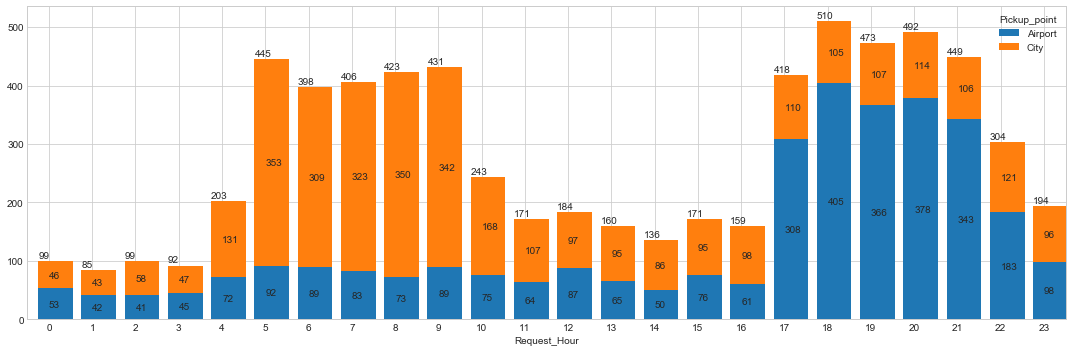

In [22]:
ax = Data_Uber.groupby(['Request_Hour','Pickup_point'])['Trip_Completed'].count().\
unstack().plot(kind="bar",stacked=True,figsize=(15,5),rot=0)
for p in ax.patches:
    h = p.get_height()
    x,y = p.get_xy()
    if y != 0:
        total = int(y + h)
        ax.annotate('{}'.format(total), (x,total+5))
    x  += .25
    y =  ( h / 2 ) +  (y - 5 )
    p.set_width(0.8)
    ax.annotate('{}'.format(p.get_height()), (x,y))
    
plt.tight_layout()
plt.show() 

The same data in a tabular format :

In [23]:
Data_Uber.pivot_table(index="Request_Hour",columns="Pickup_point",values="Request_id",
                           aggfunc="count",margins=True,margins_name="Total")[['City','Airport','Total']].T

Request_Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
Pickup_point,,,,,,,,,,,,,,,,,,,,,,,,,
City,46,43,58,47,131,353,309,323,350,342,168,107,97,95,86,95,98,110,105,107,114,106,121,96,3507
Airport,53,42,41,45,72,92,89,83,73,89,75,64,87,65,50,76,61,308,405,366,378,343,183,98,3238
Total,99,85,99,92,203,445,398,406,423,431,243,171,184,160,136,171,159,418,510,473,492,449,304,194,6745


Inference 1: During the time-slot __5AM to 9AM__ we see __high-volume__ of requests from __'City-to-Airport'__,

whereas during the time-slot __5PM to 9PM__ we see __high-volume__ of requests from __'Airport-to-City'__.

---

##### 2.2.4.3 Stacked-Bar Plot: Generate a stacked-bar plot using the Data_Uber.Request_Hour column to get the number of requests over the hours of the day grouped by whether the trip was completed or not using the column 'Trip_Completed'.
The plot will help us understand the trip completon pattern across hours of the day.

Create a new dataframe which has the hourly statistics grouped by whether the request is 'Completed' or 'Not_Completed'.

In [24]:
hourly_stats = Data_Uber.pivot_table(index="Request_Hour",columns="Trip_Completed",values="Request_id",
                           aggfunc="count",margins=True,margins_name="Total",fill_value=0)
hourly_stats['%_Trip_Completed'] = round(100*hourly_stats['Yes']/hourly_stats['Total'])
hourly_stats = hourly_stats.drop('Total').astype(int)
hourly_stats.index.name = 'Request_Hour'
hourly_stats.T

Request_Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Trip_Completed,,,,,,,,,,,,,,,,,,,,,,,,
No,59,60,62,58,125,260,231,232,268,258,127,56,63,71,48,69,68,267,346,307,331,307,150,91
Yes,40,25,37,34,78,185,167,174,155,173,116,115,121,89,88,102,91,151,164,166,161,142,154,103
Total,99,85,99,92,203,445,398,406,423,431,243,171,184,160,136,171,159,418,510,473,492,449,304,194
%_Trip_Completed,40,29,37,37,38,42,42,43,37,40,48,67,66,56,65,60,57,36,32,35,33,32,51,53


Plot a __"stacked-bar"__ plot for each of the hours of the day with stacks for __'Completed'__ and __'Not_Completed'__ requests.

The numbers within the stacked bars indicate the count of requests completed (in green) and not-completed(in red) for each of the hours.

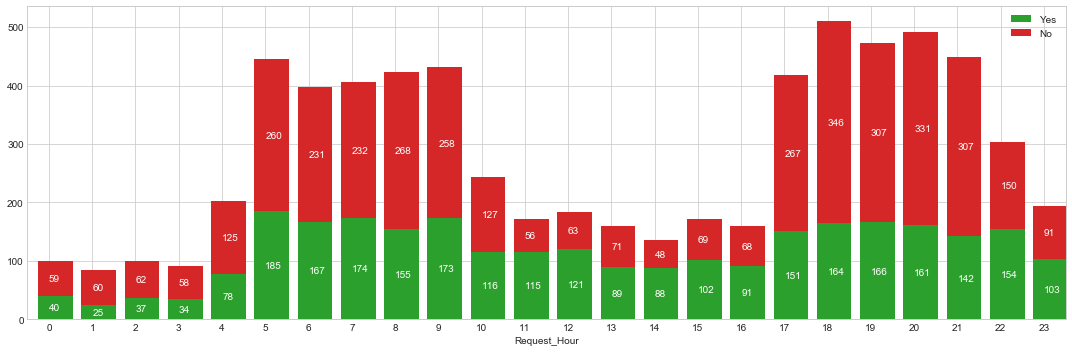

In [25]:
ax2 = hourly_stats.plot(y=['Yes','No'],kind="bar",\
                        stacked=True,figsize=(15,5),rot=0,color=['tab:green','tab:red'])

for p in ax2.patches:
    h = p.get_height()
    x,y = p.get_xy()
    x  += .25
    y =  ( h / 2 ) +  (y - 5 )
    p.set_width(0.8)
    ax2.annotate('{}'.format(p.get_height()), (x,y),color='w')
plt.legend(loc='upper right')    
plt.tight_layout()
plt.show() 

Inference 2: __High number__ of requests were __not completed__ during the dtime-slots __5AM to 9AM and 5PM to 9PM__ 

---
A __"heatmap"__ is used to depict the percentage of trips completed for each of the hours of the day.

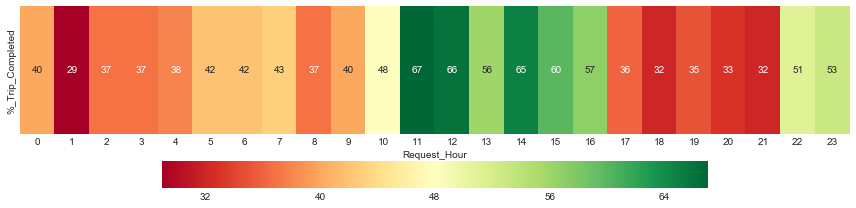

In [26]:
plt.figure(figsize=(12,3))
sns.heatmap(hourly_stats[['%_Trip_Completed']].T,\
            annot=True,cmap='RdYlGn',cbar_kws={"orientation": "horizontal"},yticklabels="")
plt.ylabel("%_Trip_Completed")

plt.tight_layout()
plt.show() 

__Inference 3:__ 

Between __10AM  and 05PM__ (Time-Slot 10AM-04PM) : The trip completion percentage is __Very-Good__.
             
Between __05PM  and 10PM__ (Time-Slot 05PM-09PM) : The trip completion percentage is __Severely-Bad__.

Between __10PM  and 01AM__ (Time-Slot 10PM-12AM) : The trip completion percentage is __Good__.

Between __01AM  and 05AM__ (Time-Slot 01AM-04AM) : The trip completion percentage is __Bad__.

Between __05AM  and 10AM__ (Time-Slot 05AM-09AM) : The trip completion percentage is __Moderately-Bad__. 

Based on the __Inference 1,2 and 3__, we can categorise five 'Time_Slots' as follows:

__1.Hours 5,6,7,8,9 (5AM-9AM)             : Morning__

__2.Hours 10,11,12,13,14,15,16 (10AM-4PM) : Mid-Day__

__3.Hours 17,18,19,20,21 (5PM-9PM)        : Evening__

__4.Hours 22,23,0 (10pM-12AM)             : Night__

__5.Hours 1,2,3,4 (1AM-4AM)               : Late-Night__



---

Write a function to determine the 'Time_Slot' based on the 'Request_Hour'. 

__Apply__ the function on all __'Request_hour'__ coulmn and save the result in a new column __'Time_Slot'__.

Display the first few rows to ensure creation of the new column with the correct value.

In [27]:
# Function to get the time-slot based on hour when the request was placed

def getTimeSlot(x):
    if 1 <= x <= 4:
        return "Late-Night(1AM-4AM)"
    elif 5 <= x <= 9:
        return "Morning(5AM-9AM)"
    elif 10 <= x <= 16:
        return "Mid-day(10AM-4PM)"
    elif 17 <= x <= 21:
        return "Evening(5PM-9PM)"
    else :
        return "Night(10PM-12AM)"

    
Data_Uber['Time_Slot'] = Data_Uber.Request_Hour.apply(getTimeSlot)

# Convert the 'Time_Slot' column to a column having categorical values
Data_Uber['Time_Slot'] = pd.Categorical(Data_Uber['Time_Slot'],
                        ['Morning(5AM-9AM)','Mid-day(10AM-4PM)', 'Evening(5PM-9PM)', 'Night(10PM-12AM)','Late-Night(1AM-4AM)'])

Data_Uber.head(10)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_Hour,Trip_Completed,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11-Jul-2016 (Mon),11,Yes,Mid-day(10AM-4PM)
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11-Jul-2016 (Mon),17,Yes,Evening(5PM-9PM)
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12-Jul-2016 (Tue),9,Yes,Morning(5AM-9AM)
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12-Jul-2016 (Tue),21,Yes,Evening(5PM-9PM)
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13-Jul-2016 (Wed),8,Yes,Morning(5AM-9AM)
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13-Jul-2016 (Wed),21,Yes,Evening(5PM-9PM)
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14-Jul-2016 (Thu),6,Yes,Morning(5AM-9AM)
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15-Jul-2016 (Fri),5,Yes,Morning(5AM-9AM)
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15-Jul-2016 (Fri),17,Yes,Evening(5PM-9PM)
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,11-Jul-2016 (Mon),6,Yes,Morning(5AM-9AM)


---

## 3 Data Analysis

---

### 3.1 Identifying the most pressing issues faced by UBER

---

#### 3.1.1 Anaysis based on individual 'Status' of requests and completion of the request
1. __'Status'__ column gives individual status of the request i.e., 'Trip Completed','Cancelled' or 'No Cars Available'.

2. __'Trip Completed'__ column tells the oversall status of the request i.e., whether the trip was completed (__Yes__) or not (__No__).


##### 3.1.1.1 Anaysis based on individual 'Status' of requests

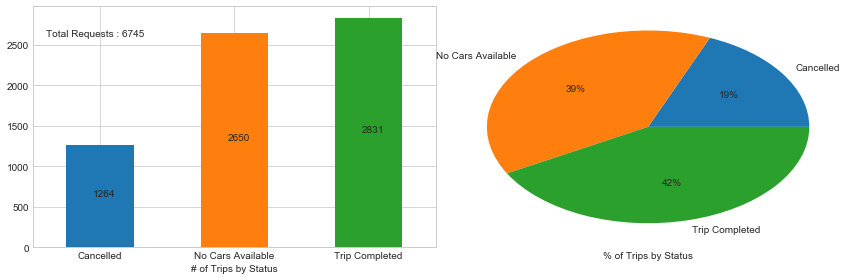

In [28]:
# Set the size of the figure
plt.figure(figsize=(12,4))

# Frequency of Trips based on 'Status' of the requests viz 'Cancelled', 'No Cars Available' and 'Trip Completed'.
# A bar chart showing the split-up of number of requests for each of the statuses
plt.subplot(1,2,1)
ax3111 = Data_Uber.groupby('Status')['Request_id'].count().plot(kind="bar",rot=0)
total_req=0
for p in ax3111.patches:
    x,y = p.get_xy()
    ax3111.annotate('{}'.format(p.get_height()), (x+0.2,p.get_height()/2))
    total_req += p.get_height()
ax3111.annotate('Total Requests : {}'.format(total_req), (-0.4,2600))
plt.xlabel("# of Trips by Status")

# A pie chart showing the split-up of pecentage of requests for each of the statuses
plt.subplot(1,2,2)
plt.pie(x=Data_Uber.groupby('Status')['Request_id'].count(),
        labels=['Cancelled','No Cars Available','Trip Completed'],autopct='%1.f%%')

plt.xlabel("% of Trips by Status")

# Show the plots
plt.tight_layout()
plt.show()

__Percentage of requests by Status__

__'Trip Completed' : 42% , 'No Cars Available' : 39% and 'Cancelled' : 19%.__

This means that __only 42% of demand is met.__

__58% of demand is not met__ , which is a huge percentage of requests not completed and needs to be addressed.

##### 3.1.1.2 Anaysis based on Trip Completion 

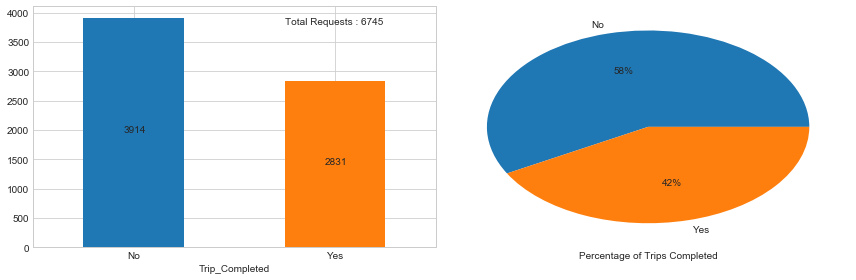

In [50]:
# Set the size of the figure
plt.figure(figsize=(12,4))

# Frequency of Trips 'Completed' and 'Not_Completed'
# A bar chart showing the split-up of number of requests which were 'Completed' and 'Not_Completed'
plt.subplot(1,2,1)
ax3112 = Data_Uber.groupby('Trip_Completed')['Request_id'].count().plot(kind="bar",rot=0)
total_req=0
for p in ax3112.patches:
    x,y = p.get_xy()
    ax3112.annotate('{}'.format(p.get_height()), (x+0.2,p.get_height()/2))
    total_req += p.get_height()
ax3112.annotate('Total Requests : {}'.format(total_req), (x,3800))

# A pie chart showing the split-up of pecentage of requests which were 'Completed' and 'Not_Completed'    
plt.subplot(1,2,2)
plt.pie(x=Data_Uber.groupby('Trip_Completed')['Request_id'].count(),
        labels=['No','Yes'],autopct='%1.f%%')
plt.xlabel("Percentage of Trips Completed")


# Show the plots
plt.tight_layout()
plt.show()

__Only 42% of demand is met.__

__58% of demand is not met__ , which is a huge percentage of requests not completed and needs to be addressed.

##### 3.1.1.3 Anaysis of Trips 'Not_Completed' 

The requests which were not completed comprise of requests with statuses 'Cancelled' and 'No Cars Available'. 

Plots considering only the requests with status' 'Cancelled' and 'No Cars Available' to identify the status-segment of the requests which were not completed. 

This would help us in identifying the reason due to which a majority of the requests are not being fulfilled. 

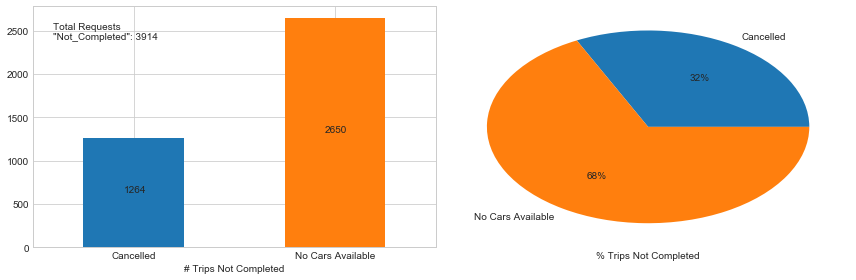

In [30]:
# Set the size of the figure

# A bar chart showing the split-up of number of Trips Not-Completed due to status 'Cancelled' and 'No Cars Available'.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax3113 = Data_Uber[Data_Uber.Status != 'Trip Completed'].\
groupby('Status')['Request_id'].count().plot(kind="bar",rot=0)

total_req=0
for p in ax3113.patches:
    x,y = p.get_xy()
    ax3113.annotate('{}'.format(p.get_height()), (x+0.2,p.get_height()/2))
    total_req += p.get_height()
ax3113.annotate('Total Requests \n"Not_Completed": {}'.format(total_req), (-0.4,2400))
plt.xlabel("# Trips Not Completed")

# A pie chart showing the split-up of pecentage of Trips Not-Completed due to status 'Cancelled' and 'No Cars Available'.
plt.subplot(1,2,2)
plt.pie(x=Data_Uber[Data_Uber.Status != 'Trip Completed'].groupby('Status')['Request_id'].count(),
        labels=['Cancelled','No Cars Available'],autopct='%1.f%%')
plt.xlabel("% Trips Not Completed")

plt.tight_layout()
plt.show()

__68%__ of the trips were not completed due to the reason __'No Cars Available'__ , which indicates that there is a shortage of supply of cars.

__32%__ of the trips were not completed as the Driver Partner 'Calcelled' the trip. Reasons for cancellation of trips by the Driver Partners will have to be documented and analysed.

---

__Major Problem-Areas identified from analysis based on 'Status' and 'Trip_Completed' columns:__

1. 58% of trips are not completed i.e., __6 out of 10 trip requests are not completed. __

2. 39% of trips are not completed due to 'No Cars Available' i.e., __4 out of 10 trip requests are not completed due to unavailability of cars__.

3. 19% of trips are not completed due to trip 'Cancelled' by Driver Partner i.e., __2 out of 10 trip requests are not completed due to cancellation by Driver Partner__.

4. Of the "Trips Not-Completed" , the major reason for non-completion is 'No Cars Available' ( 68% ) , followed by 'Cancelled' requests ( 32% ). __Nearly 7 out 10 "Trips Not-Completed" are due to Cars not available.__

---
---

#### 3.1.2 Anaysis based on 'Pickup_point' ( location ) of the request 

---

##### 3.1.2.1 Anaysis based only on 'Pickup_point' of the request

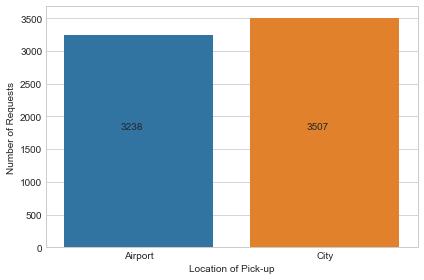

In [31]:
# A bar chart showing the split-up of number of requests for each of the pickup locations: City and Airport
ax3121 = sns.barplot(data=Data_Uber,x='Pickup_point',y='Request_id',estimator=len)

for p in ax3121.patches:
    x,y = p.get_xy()
    ax3121.annotate('{}'.format(p.get_height()), (x+.3,1800))
plt.xlabel("Location of Pick-up")
plt.ylabel("Number of Requests")

plt.tight_layout()
plt.show()

The number shown inside the bar is the number of requests received from that particular Pickup Point.

The number of requests from __City-to-Airport( 3507 )__ is marginally greater than the number of requests from __Airport-to-City( 3238 )__ .

This could be due to other services available at the ariport like Dedicated-Airport Taxi, Bus Services, Competitors etc.

##### 3.1.2.2 Anaysis of Trip 'Status' based on 'Pickup_point'

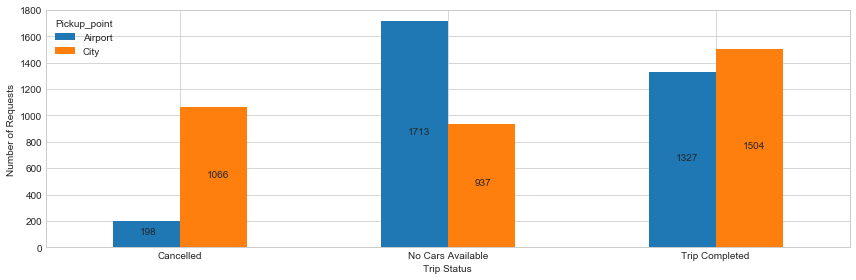

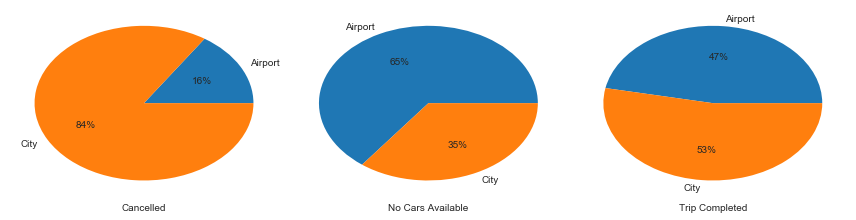

In [32]:
# A bar chart showing the split-up of number of requests for each of the statuses grouped by pickup point
ax3122 = Data_Uber.pivot_table(index="Status",columns="Pickup_point",values="Request_id",
                           aggfunc="count").plot(kind="bar",rot=0,figsize=(12,4),sort_columns=True)

for p in ax3122.patches:
    x,y = p.get_xy()
    ax3122.annotate('{}'.format(p.get_height()), (x+.1,p.get_height()/2))
plt.xlabel("Trip Status")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


# Pie charts showing the split-up of pecentage of requests for each of the statuses grouped by pickup point
plt.figure(figsize=(12,6))
for i,k in enumerate(sorted(Data_Uber.Status.unique())):
    plt.subplot(2,3,i+1)
    plt.pie(x=Data_Uber[Data_Uber.Status == k].groupby(['Status','Pickup_point'])['Request_id'].count(),
        autopct='%1.f%%',labels=['Airport','City'])
    plt.xlabel(k)
    
plt.tight_layout()
plt.show()

__Inferences :__

1. Of the total number of trip not completed due to cancellations by Driver Partner i.e., __'Cancelled'__ status, __84%__ of the cancellations have happened for requests for __City-to-Airport__ Trips. Driver Partners are hesitant to take trips from City-to-Airport and the reason for the same needs to be analysed.


2. Of the total number of trip not completed due to unavailibity of car i.e., __'No Cars Available'__ status, __65%__ of the supply-crunch was for requests for __Airport-to-City__ Trips and __35%__ for __'City-to-Airport'__ trips. The shortage of cars is evident in both the types of trips be is very sever for Airport-to-City trips.

Since, a lot of Driver Partners are cancelling their trips to the airport, a situation of low supply may be getting created at the airport where the trips are not getting completed due to the reason 'No Cars Available'. 

Need to understand the reasons why there is a high percentage of cancellation of trips from city to airport by the Driver partner. There could be many reasons like duration of time to commute to the airport, hour of the day when the request was placed, toll-plaza charges which the driver incurs , less fare being charged etc.

##### 3.1.2.3 Anaysis of Trip Completion Status based on 'Pickup_point'

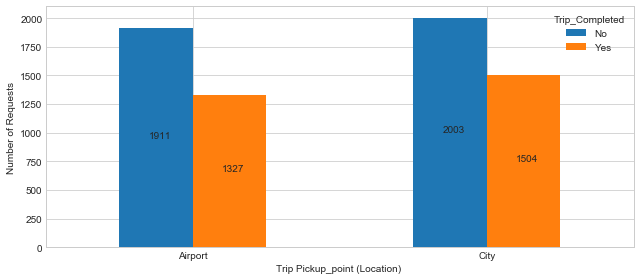

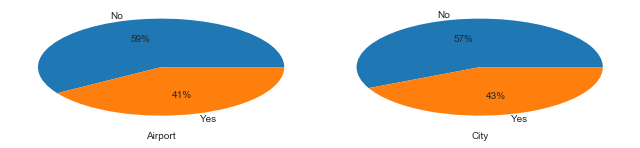

In [33]:
# A bar chart showing the split-up of number of trips by completion status for each of the pickup locations
ax3123 = Data_Uber.pivot_table(index="Pickup_point",columns="Trip_Completed",values="Request_id",
                           aggfunc="count").plot(kind="bar",rot=0,figsize=(9,4),sort_columns=True)

for p in ax3123.patches:
    x,y = p.get_xy()
    ax3123.annotate('{}'.format(p.get_height()), (x+.1,p.get_height()/2))
plt.xlabel("Trip Pickup_point (Location) ")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


# A pie chart showing the split-up of pecentage of trips by completion status for each of the pickup locations
plt.figure(figsize=(9,4))
for i,k in enumerate(sorted(Data_Uber.Pickup_point.unique())):
    plt.subplot(2,2,i+1)
    plt.pie(x=Data_Uber[Data_Uber.Pickup_point == k].groupby(['Trip_Completed','Pickup_point'])['Request_id'].count(),
        autopct='%1.f%%',labels=['No','Yes'])
    plt.xlabel(k)
    
plt.tight_layout()
plt.show()

There is __no significant difference__ in the __Trip Non-Completion__ percentage w.r.t to the location of the request, with __59%__ of __Airport-to-City__ requests are not getting completed and __57%__ of __City-to-Airport__ requests are not getting completed.


##### 3.1.2.4 Anaysis of Trip Not-Completed based on 'Pickup_point'

Identify the reason for Trip Non-completion based on the pickup location

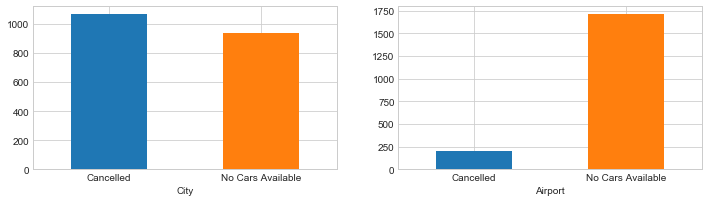

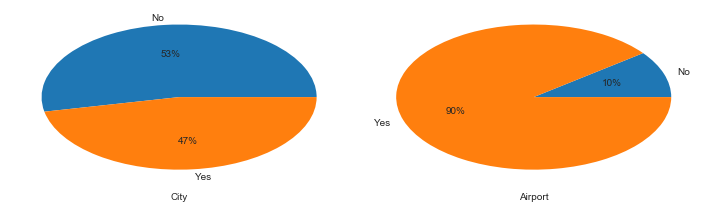

In [34]:
# Subplots using bar chart segmented by reason for trips not completed across pickup locations
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
Data_Uber[(Data_Uber.Status != "Trip Completed") & (Data_Uber.Pickup_point == "City")].\
groupby(['Status','Pickup_point'])['Request_id'].count().\
plot(kind="bar",rot=0,subplots=True)#,xticks=(range(2),['Cancelled','No Cars Available']))
plt.xticks(range(2),['Cancelled','No Cars Available'])
plt.xlabel("City")
plt.title("")


plt.subplot(1,2,2)
Data_Uber[(Data_Uber.Status != "Trip Completed") & (Data_Uber.Pickup_point == "Airport")].\
groupby(['Status','Pickup_point'])['Request_id'].count().\
plot(kind="bar",rot=0,subplots=True)#,xticks=['Cancelled','No Cars Available'])
plt.xticks(range(2),['Cancelled','No Cars Available']) 
plt.xlabel("Airport")
plt.title("")

# Subplots using pie chart segmented by reason for trips not completed across pickup locations
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.pie(x=Data_Uber[(Data_Uber.Status != "Trip Completed") & (Data_Uber.Pickup_point == "City")].\
        groupby(['Status','Pickup_point'])['Request_id'].count(),
        autopct='%1.f%%',labels=['No','Yes'])
plt.xlabel("City")

plt.subplot(1,2,2)
plt.pie(x=Data_Uber[(Data_Uber.Status != "Trip Completed") & (Data_Uber.Pickup_point == "Airport")].\
        groupby(['Status','Pickup_point'])['Request_id'].count(),
        autopct='%1.f%%',labels=['No','Yes'])
plt.xlabel("Airport")

plt.tight_layout()
plt.show()

For __City-to-Airport__ requests, trips not completed due to reason __'Cancelled' ( 53% )__ ( Driver Partner cancelled the trip)  is marginally higher than the trips not completed due to reason __'No Cars Available' ( 47% )__. Both the reasons contribute almost equally for the requests not getting fulfilled. 

For __Airport-to-City__ requests, trips not completed due to reason __'No Cars Available' ( 90% )__ is siginificantly higher than the trips not completed due to reason __'Cancelled' at ( 10% )__. 

__Unavaiibility of Cars__  is the major reason for requests not getting fulfilled for __Airport-to-City__ requests.

---


__Major Problem-Areas identified from analysis based on 'Pickup_point' column:__

1. 84% cancellation by Driver Partner for __City-to-Airport__ trip requests. __Many driver partners are not willing to take a trip from __City-to-Airport__.


2. 65% supply crunch for Airport-to-City trip requests and 35% supply crunch for City-to-Airport trip requests. __There is an overall supply crunch as compared to the demand for City-to-Airport/Airport-to-City trip requests. However, the supply crunch is severe for Airport-to-City trip requests__.

---
---

#### 3.1.3 Anaysis of requests based on 'Time_Slots'

##### 3.1.3.1 Anaysis of requests based only on 'Time_Slots'

In [35]:
Data_Uber.groupby('Time_Slot')['Request_id'].count()

Time_Slot
Morning(5AM-9AM)       2103
Mid-day(10AM-4PM)      1224
Evening(5PM-9PM)       2342
Night(10PM-12AM)        597
Late-Night(1AM-4AM)     479
Name: Request_id, dtype: int64

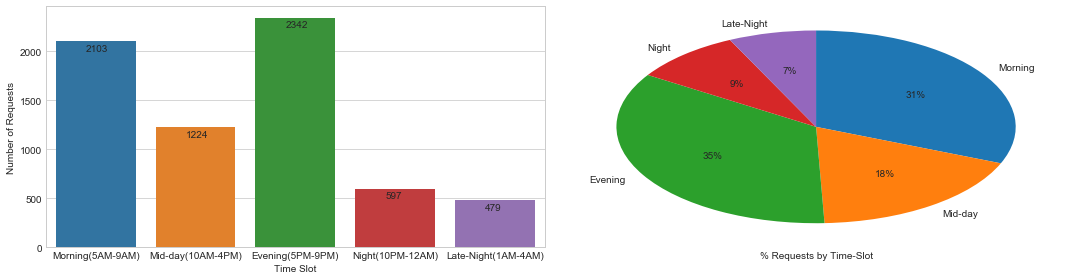

In [36]:
# Bar plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax316 = sns.barplot(data=Data_Uber,x='Time_Slot',y='Request_id',estimator=len)

for p in ax316.patches:
    x,y = p.get_xy()
    ax316.annotate('{}'.format(p.get_height()), (x+.3,p.get_height()-100))
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")

# Pie plot
plt.subplot(1,2,2)
plt.pie(x=Data_Uber.groupby('Time_Slot')['Request_id'].count(),
        autopct='%1.f%%',
        labels=['Morning','Mid-day','Evening','Night','Late-Night'],
        counterclock=False,startangle=90)
plt.xlabel("% Requests by Time-Slot")


plt.tight_layout()
plt.show()

As noticed, there is significantly high-volume of requests during __'Morning(5AM-9AM)'__ and __'Evening(5PM-9PM)'__( also discovered in earlier visualizations for determining the Time-Slots).

##### 3.1.3.2 Anaysis of requests from 'Pickup_point' spread across the various 'Time_Slot's

In [37]:
Data_Uber.sort_values(by="Time_Slot").pivot_table(index="Time_Slot",columns="Pickup_point",values="Request_id",aggfunc="count")

Pickup_point,Airport,City
Time_Slot,,
Morning(5AM-9AM),426,1677
Mid-day(10AM-4PM),478,746
Evening(5PM-9PM),1800,542
Night(10PM-12AM),334,263
Late-Night(1AM-4AM),200,279


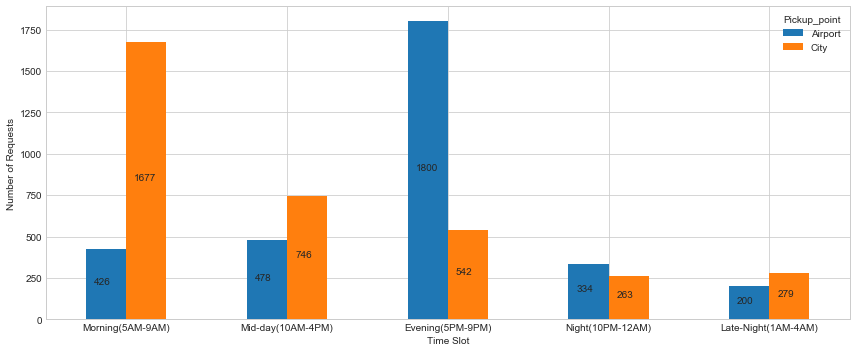

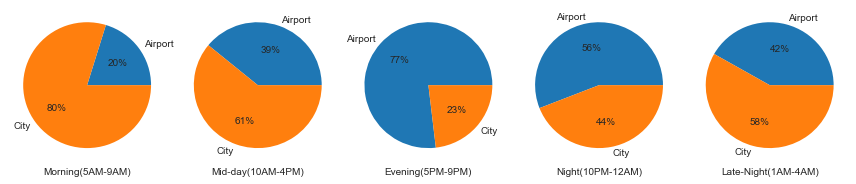

In [38]:
# Bar plot
ax3132 = Data_Uber.sort_values(by="Time_Slot").\
pivot_table(index="Time_Slot",columns="Pickup_point",values="Request_id",aggfunc="count").\
plot(kind="bar",rot=0,figsize=(12,5))

for p in ax3132.patches:
    x,y = p.get_xy()
    ax3132.annotate('{}'.format(p.get_height()), (x+.05,p.get_height()/2))
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")

plt.tight_layout()
plt.show()


#Pie plot
plt.figure(figsize=(12,5))
for i,k in enumerate(Data_Uber.Time_Slot.values.categories):
    plt.subplot(2,5,i+1)
    plt.pie(x=Data_Uber[Data_Uber.Time_Slot == k].groupby(['Time_Slot','Pickup_point'])['Request_id'].count(),
        autopct='%1.f%%',labels=['Airport','City'])
    plt.xlabel(k)
    
plt.tight_layout()
plt.show()

From the above plots we notice that the requests from __City-to-Airport__ are the __highest__ during __'Morning(5AM-9AM)__ and the demand goes down as the day progresses.

On the other hand, requests from __Airport-to-City__ show a __peak__ during __'Evening(5PM-9PM)'__ and are flat for rest of the day.

##### 3.1.3.3 Anaysis of 'Status' of the requests spread across the various 'Time_Slot's

In [39]:
Data_Uber.sort_values(by="Time_Slot").\
pivot_table(index="Time_Slot",columns="Status",values="Request_id",aggfunc="count")\
[['Trip Completed','Cancelled','No Cars Available']]

Status,Trip Completed,Cancelled,No Cars Available
Time_Slot,,,
Morning(5AM-9AM),854,843,406
Mid-day(10AM-4PM),722,168,334
Evening(5PM-9PM),784,166,1392
Night(10PM-12AM),297,25,275
Late-Night(1AM-4AM),174,62,243


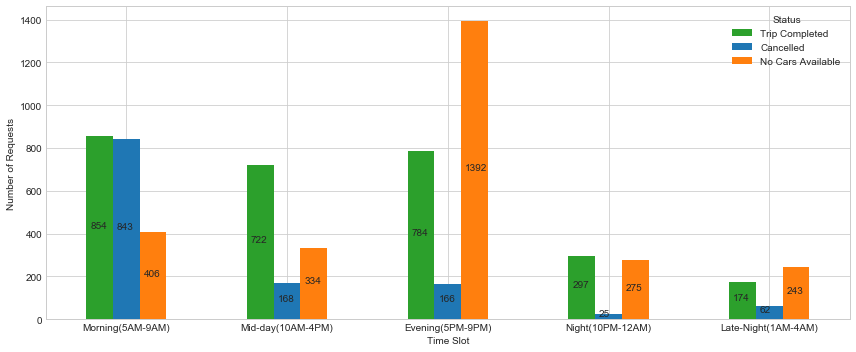

In [40]:
# Pie plot
ax3133 = Data_Uber.sort_values(by="Time_Slot").\
pivot_table(index="Time_Slot",columns="Status",values="Request_id",aggfunc="count")\
[['Trip Completed','Cancelled','No Cars Available']].\
plot(kind="bar",rot=0,figsize=(12,5),color=['tab:green','tab:blue','tab:orange'])

for p in ax3133.patches:
    x,y = p.get_xy()
    #x += 0.2
    ax3133.annotate('{}'.format(p.get_height()), (x+0.025,p.get_height()/2))
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")

plt.tight_layout()
plt.show()

The number of __'Trips Completed'__ decreases as the hours of the day proceed from Morning to Late-Night.

The number of trips not completed due to __'Cancelled'__ status decreases as the day proceeds from morning to night. __Maximum Trips cancelled during 'Morning' time-slot__.

The number of trips not completed due to __'No Cars Available'__ status is __highest__ during the __'Evening'__ time-slot and is flat for rest of the day.

##### 3.1.3.4 Anaysis of the completion status of requests spread across the various 'Time_Slot's

In [41]:
Data_Uber.sort_values(by="Time_Slot").\
pivot_table(index="Time_Slot",columns="Trip_Completed",values="Request_id",aggfunc="count")

Trip_Completed,No,Yes
Time_Slot,,
Morning(5AM-9AM),1249,854
Mid-day(10AM-4PM),502,722
Evening(5PM-9PM),1558,784
Night(10PM-12AM),300,297
Late-Night(1AM-4AM),305,174


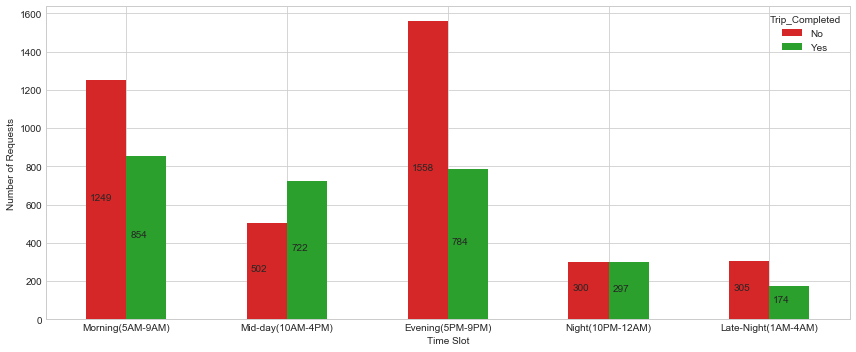

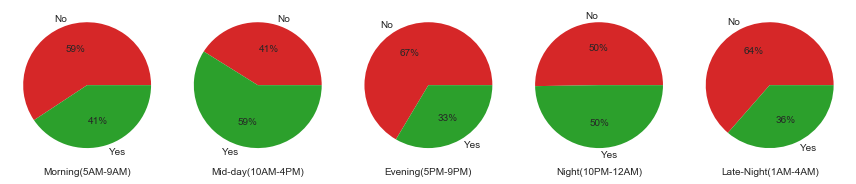

In [42]:
# Bar plot
ax3134 = Data_Uber.sort_values(by="Time_Slot").\
pivot_table(index="Time_Slot",columns="Trip_Completed",values="Request_id",aggfunc="count").\
plot(kind="bar",rot=0,figsize=(12,5),color=['tab:red','tab:green'])

#[['Trip Completed','Cancelled','No Cars Available']].\

for p in ax3134.patches:
    x,y = p.get_xy()
    #x += 0.2
    ax3134.annotate('{}'.format(p.get_height()), (x+0.025,p.get_height()/2))
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")

plt.tight_layout()
plt.show()

# Pie plot
plt.figure(figsize=(12,5))
for i,k in enumerate(Data_Uber.Time_Slot.values.categories):
    plt.subplot(2,5,i+1)
    plt.pie(x=Data_Uber[Data_Uber.Time_Slot == k].groupby(['Time_Slot','Trip_Completed'])['Request_id'].count(),
        autopct='%1.f%%',labels=['No','Yes'],colors=['tab:red','tab:green'])
    plt.xlabel(k)
    
plt.tight_layout()
plt.show()

The time-slots where the 'Trip COmpletion' percentage is poor are :
    1. Morning(5AM-9AM)
    2. Evening(5PM-9PM)
    3. Late-Night(1AM-4AM)
    
However, the volume of requests is significantly low during __'Late-Night(1AM-4AM)'__ as compared to the other two time-slots.

The bottom-2 time-slots by trip completion percentage are:

  __1. Morning(5AM-9AM) - 59%__
    
  __2. Evening(5PM-9PM) - 67%__
    
The next analysis would be to find the major reason for request not getting fulfilled in these bottom-2 time_slots.

##### 3.1.3.5 Anaysis of the Trips Not-Completed status spread across the various 'Time_Slot's

In [43]:
Data_Uber[(Data_Uber.Status != 'Trip Completed')].groupby(['Time_Slot','Status'])['Request_id'].count().unstack()

Status,Cancelled,No Cars Available
Time_Slot,,
Morning(5AM-9AM),843,406
Mid-day(10AM-4PM),168,334
Evening(5PM-9PM),166,1392
Night(10PM-12AM),25,275
Late-Night(1AM-4AM),62,243


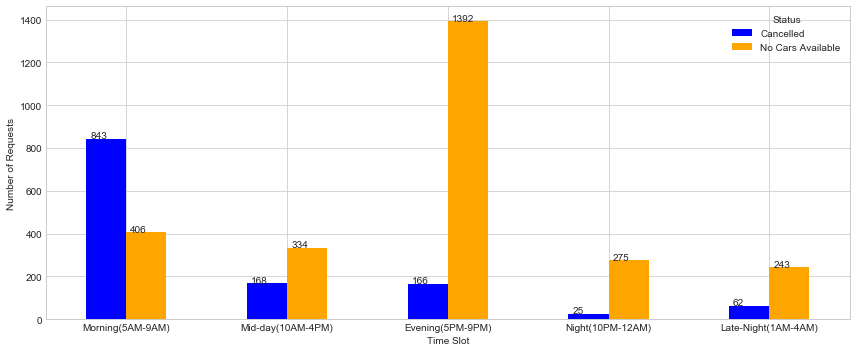

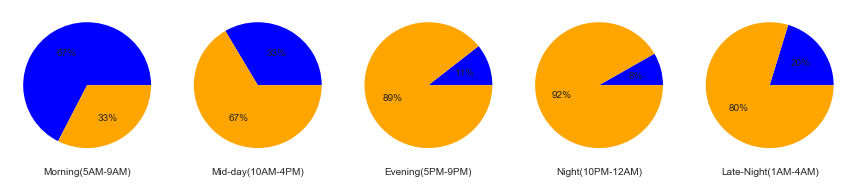

In [44]:
# Bar plot
ax3135 = Data_Uber[Data_Uber.Status != 'Trip Completed'].sort_values(by="Time_Slot").\
pivot_table(index="Time_Slot",columns="Status",values="Request_id",aggfunc="count").\
plot(kind="bar",rot=0,figsize=(12,5),color=['blue','orange'])

for p in ax3135.patches:
    x,y = p.get_xy()
    #x += 0.2
    ax3135.annotate('{}'.format(p.get_height()), (x+0.025,p.get_height()+2))
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")

plt.tight_layout()
plt.show()

# Pie plot
plt.figure(figsize=(12,5))
for i,k in enumerate(Data_Uber.Time_Slot.values.categories):
    plt.subplot(2,5,i+1)
    plt.pie(x=Data_Uber[(Data_Uber.Time_Slot == k) & (Data_Uber.Status != 'Trip Completed')].
            groupby(['Time_Slot','Status'])['Request_id'].count(),
        autopct='%1.f%%',colors=['blue','orange'])
    plt.xlabel(k)
    
plt.tight_layout()
plt.show()

In the __'Morning(5AM-9AM)'__' time-slot, the major reason for request not getting fulfilled is __'Cancelled'__ i.e., Driver partner cancelled the trip.

In the __'Evening(5PM-9PM)'__' time-slot, the major reason for request not getting fulfilled is __'No Cars Available'__.

---


__Major Problem-Areas identified from analysis based on 'Time_Slot' column:__

1. The __2 time-slots__ which have the __worst trip completion percentages__ are : __'Morning(5AM-9AM) 59%'__ and __'Evening(5PM-9PM) 67%'__, since these two time-slots also witness the highest volume of requests.


2. During __'Morning(5AM-9AM)'__ time-slot, the __major reason__ for trip non-completion __( 67% )__ is __Cancelaltion by Driver Partner__. 
   During __'Evening(5PM-9PM)'__ time-slot, the __major reason__ for trip non-completion __( 89% )__ is __Unavailibility of Cars__. 
---

### 3.1 SUMMARY : Most pressing issues faced by UBER

1. 58% of trips are not completed i.e., __6 out of 10 trip requests are not completed__. Out of these, __4 trip requests are not completed due to unavailability of cars__ and __2 trip requests are not completed due to cancellation by Driver Partner__.

2. The major reason for non-completion of trips is __'No Cars Available' ( 68% )__ , followed by __'Cancelled' ( 32% )__ requests . __Nearly 7 out 10 "Trips Not-Completed" are due to Cars not available.__

3. The major reason __(84%)__ for non-completion of trips from __City-to-Airport__ is due to cancellation by Driver Partner. __Many driver partners are not willing to take a trip from __City-to-Airport__.

4. 65% supply crunch for Airport-to-City trip requests and 35% supply crunch for City-to-Airport trip requests. __There is an overall supply crunch as compared to the demand for City-to-Airport/Airport-to-City trip requests. However, the supply crunch is severe for Airport-to-City trip requests__.

5. The __2 time-slots__ which have the __worst trip completion percentages__ are : __'Morning(5AM-9AM) 59%'__ and __'Evening(5PM-9PM) 67%'__, since these two time-slots also witness the highest volume of requests.


6. During __'Morning(5AM-9AM)'__ time-slot, the __major reason__ for trip non-completion __( 67% )__ is __Cancelaltion by Driver Partner__. 
   During __'Evening(5PM-9PM)'__ time-slot, the __major reason__ for trip non-completion __( 89% )__ is __Unavailibility of Cars__. 

---

### 3.2 Supply-Demand Gap Analysis
---

__Demand__ is the total number of requests received by UBER ( in this case from City-to-Airport and Airport-to-City only). It is is a summation of the 'Status's : 'Trip Completed', 'Cancelled' and 'No Cars Available'.

__Demand = (Number of 'Trip Completed') + (Number of 'Cancelled') + (Number of 'No Cars Available')__

---

__Supply__ is the total number of requests that were successfully completed by UBER. It is the number of requests with status as 'Trip Completed'.

__Supply = (Number of 'Trip Completed')

---

__Supply_Demand Gap__ is the number of requests that were not fulfilled by UBER. It is the difference between "the total number of requests" minus "the number of requests that were completed". In other words it is the difference between __Demand__ and __Supply__. It can also be looked at as  __'Cancelled' plus 'No Cars Available'__ requests.

__Supply_Demand_Gap = Demand - Supply__

__ OR __

__ Supply_Demand_Gap = (Number of 'Cancelled') + (Number of 'No Cars Available')__

---

#### 3.2.1 Time slots when the highest gap exists

In [45]:
Data_Uber[Data_Uber.Status != 'Trip Completed'].\
groupby('Time_Slot')['Request_id'].count().to_frame().rename(columns={'Request_id' : 'Supply_Demand_Gap'}).T

Time_Slot,Morning(5AM-9AM),Mid-day(10AM-4PM),Evening(5PM-9PM),Night(10PM-12AM),Late-Night(1AM-4AM)
Supply_Demand_Gap,1249,502,1558,300,305


__'Time_Slot'__s with __TOP-2 Supply_Demand_Gap__ are :

1. __Evening(5PM-9PM)__ with 1558 unfulfilled requests.

2. __Morning(5AM-9AM)__ with 1249 unfulfilled requests.

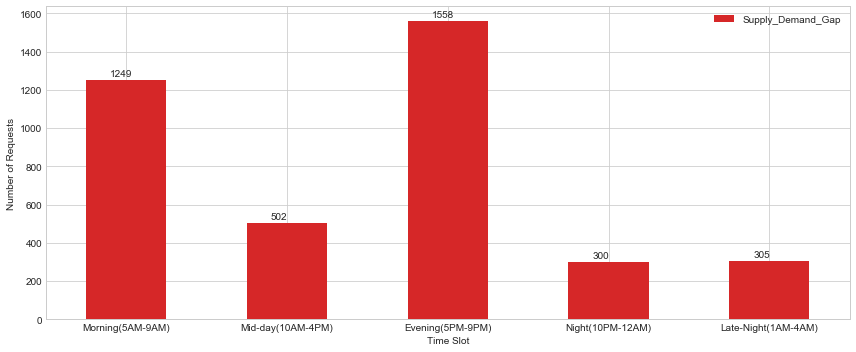

In [46]:
ax321 = Data_Uber[Data_Uber.Status != 'Trip Completed'].\
groupby('Time_Slot')['Request_id'].count().to_frame().rename(columns={'Request_id' : 'Supply_Demand_Gap'}).\
plot(kind='bar',rot=0,figsize=(12,5),color='tab:red')

for p in ax321.patches:
    x,y = p.get_xy()
    ax321.annotate('{}'.format(p.get_height()), (x+.15,p.get_height()+20))
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")

plt.tight_layout()
plt.show()

#### 3.2.2 Request type (city-airport or airport-city) in time-slots identified with severe Supply_Demand_Gap

In [47]:
Data_Uber[Data_Uber.Status != 'Trip Completed'].\
groupby(['Time_Slot','Pickup_point'])['Request_id'].count().\
unstack()

Pickup_point,Airport,City
Time_Slot,,
Morning(5AM-9AM),44,1205
Mid-day(10AM-4PM),151,351
Evening(5PM-9PM),1427,131
Night(10PM-12AM),169,131
Late-Night(1AM-4AM),120,185


__RequestType ("Pickup_point') where Supply_Demand_Gap is severe__ :

1. __Evening(5PM-9PM)__ : 1427 __Airport-to-City__ requests of the total 1558 unfulfilled requests.


2. __Morning(5AM-9AM)__ : 1205 __City-to-Airport__ requests of the total 1249 unfulfilled requests.

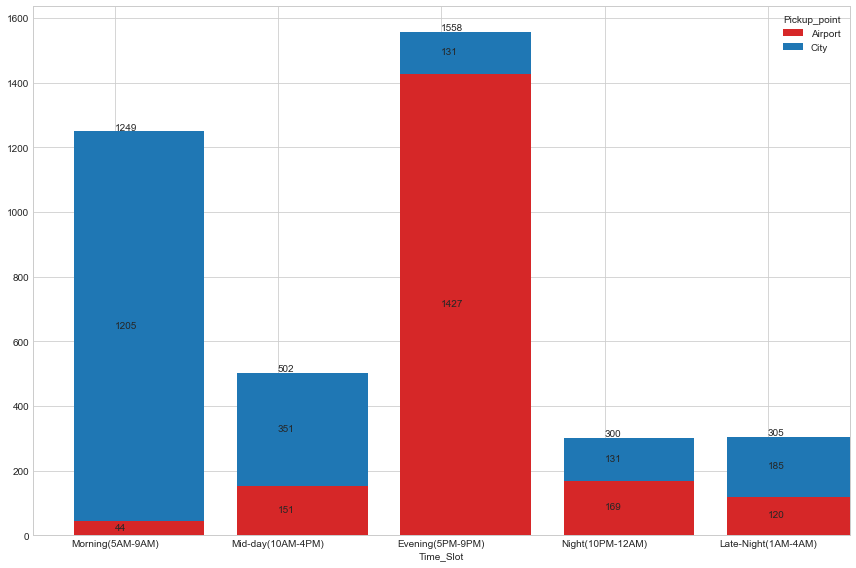

In [49]:
ax322 = Data_Uber[Data_Uber.Status != 'Trip Completed'].\
groupby(['Time_Slot','Pickup_point'])['Request_id'].count().unstack().\
plot(kind="bar",stacked=True,figsize=(12,8),rot=0,color=['tab:red','tab:blue'])

for p in ax322.patches:
    h = p.get_height()
    x,y = p.get_xy()
    if y != 0:
        total = int(y + h)
        ax322.annotate('{}'.format(total), (x+.25,total+5))
    x  += .25
    y =  ( h / 2 ) +  (y - 5 )
    p.set_width(0.8)
    ax322.annotate('{}'.format(p.get_height()), (x,y))
    
plt.tight_layout()
plt.show() 

### END ###

---